In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pd.reset_option("display.max_rows")

In [3]:
ds = pd.read_csv('data/AI검증용 DB_20210831.csv', encoding='utf8')
ds

,seqStamp,"('Resistance', 1)","('Volt', 1)","('Temp', 1)","('Resistance', 2)","('Volt', 2)","('Temp', 2)","('Resistance', 3)","('Volt', 3)","('Temp', 3)",...,"('Temp', 93)","('Resistance', 94)","('Volt', 94)","('Temp', 94)","('Resistance', 95)","('Volt', 95)","('Temp', 95)","('Resistance', 96)","('Volt', 96)","('Temp', 96)"
0,0,0.487,4.47,20.5,0.472,4.45,NaN,0.492,4.46,NaN,...,NaN,0.477,2.24,NaN,0.476,2.24,NaN,0.484,2.25,NaN
1,1,0.488,4.47,20.2,0.473,4.44,NaN,0.491,4.46,NaN,...,NaN,0.477,2.24,NaN,0.474,2.24,NaN,0.490,2.25,NaN
2,2,0.487,4.47,20.3,0.474,4.45,NaN,0.492,4.46,NaN,...,NaN,0.473,2.23,NaN,0.476,2.24,NaN,0.488,2.25,NaN
3,3,0.486,4.48,19.5,0.475,4.45,NaN,0.491,4.46,NaN,...,NaN,0.473,2.23,NaN,0.475,2.23,NaN,0.491,2.25,NaN
4,4,0.488,4.47,19.9,0.476,4.44,NaN,0.491,4.46,NaN,...,NaN,0.479,2.23,NaN,0.477,2.24,NaN,0.491,2.24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1496,0.583,4.44,19.1,0.646,4.43,NaN,0.628,4.43,NaN,...,NaN,0.510,2.22,NaN,0.502,2.23,NaN,0.383,2.24,NaN
1497,1497,0.581,4.44,19.7,0.645,4.42,NaN,0.627,4.43,NaN,...,NaN,0.509,2.22,NaN,0.501,2.22,NaN,0.381,2.23,NaN
1498,1498,0.581,4.45,19.4,0.648,4.42,NaN,0.627,4.43,NaN,...,NaN,0.507,2.22,NaN,0.498,2.22,NaN,0.376,2.23,NaN
1499,1499,0.587,4.09,19.7,0.640,4.08,NaN,0.622,4.07,NaN,...,NaN,0.507,2.23,NaN,0.498,2.23,NaN,0.376,2.24,NaN


In [4]:
ds = ds.transpose()

In [5]:
ds = ds.drop(['seqStamp'], axis=0)

In [6]:
column_list = []
for i in range(len(ds)):
    if (i%3)==0:
        column_list.append(i)
        
df = ds.iloc[column_list]

In [7]:
column = np.arange(len(df))
df.index = column
df

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,0.487,0.488,0.487,0.486,0.488,0.487,0.488,0.485,0.485,0.488,...,0.583,0.583,0.584,0.583,0.582,0.583,0.581,0.581,0.587,0.587
1,0.472,0.473,0.474,0.475,0.476,0.475,0.476,0.474,0.473,0.474,...,0.644,0.645,0.647,0.647,0.648,0.646,0.645,0.648,0.640,0.642
2,0.492,0.491,0.492,0.491,0.491,0.491,0.492,0.491,0.492,0.492,...,0.632,0.632,0.631,0.631,0.630,0.628,0.627,0.627,0.622,0.628
3,0.489,0.490,0.489,0.492,0.492,0.492,0.493,0.491,0.492,0.491,...,0.625,0.627,0.626,0.625,0.624,0.621,0.621,0.623,0.622,0.620
4,0.478,0.477,0.475,0.476,0.476,0.476,0.477,0.475,0.477,0.478,...,0.635,0.635,0.636,0.634,0.633,0.633,0.635,0.635,0.641,0.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.480,0.477,0.479,0.480,0.479,0.479,0.480,0.483,0.479,0.479,...,0.467,0.469,0.472,0.471,0.467,0.469,0.469,0.470,0.470,0.465
92,0.485,0.484,0.485,0.488,0.487,0.487,0.487,0.486,0.485,0.486,...,0.515,0.515,0.517,0.519,0.518,0.519,0.518,0.514,0.514,0.517
93,0.477,0.477,0.473,0.473,0.479,0.478,0.474,0.477,0.477,0.479,...,0.512,0.513,0.515,0.516,0.515,0.510,0.509,0.507,0.507,0.515
94,0.476,0.474,0.476,0.475,0.477,0.478,0.477,0.476,0.480,0.484,...,0.507,0.504,0.501,0.500,0.504,0.502,0.501,0.498,0.498,0.493


In [8]:
label = np.arange(1,len(df)+1,1)
label = label.tolist()
label = pd.DataFrame(label)
label.columns = ['CellNo']

In [9]:
resist = pd.DataFrame(df)

In [10]:
data = pd.concat([resist, label], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,1492,1493,1494,1495,1496,1497,1498,1499,1500,CellNo
0,0.487,0.488,0.487,0.486,0.488,0.487,0.488,0.485,0.485,0.488,...,0.583,0.584,0.583,0.582,0.583,0.581,0.581,0.587,0.587,1
1,0.472,0.473,0.474,0.475,0.476,0.475,0.476,0.474,0.473,0.474,...,0.645,0.647,0.647,0.648,0.646,0.645,0.648,0.640,0.642,2
2,0.492,0.491,0.492,0.491,0.491,0.491,0.492,0.491,0.492,0.492,...,0.632,0.631,0.631,0.630,0.628,0.627,0.627,0.622,0.628,3
3,0.489,0.490,0.489,0.492,0.492,0.492,0.493,0.491,0.492,0.491,...,0.627,0.626,0.625,0.624,0.621,0.621,0.623,0.622,0.620,4
4,0.478,0.477,0.475,0.476,0.476,0.476,0.477,0.475,0.477,0.478,...,0.635,0.636,0.634,0.633,0.633,0.635,0.635,0.641,0.631,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.480,0.477,0.479,0.480,0.479,0.479,0.480,0.483,0.479,0.479,...,0.469,0.472,0.471,0.467,0.469,0.469,0.470,0.470,0.465,92
92,0.485,0.484,0.485,0.488,0.487,0.487,0.487,0.486,0.485,0.486,...,0.515,0.517,0.519,0.518,0.519,0.518,0.514,0.514,0.517,93
93,0.477,0.477,0.473,0.473,0.479,0.478,0.474,0.477,0.477,0.479,...,0.513,0.515,0.516,0.515,0.510,0.509,0.507,0.507,0.515,94
94,0.476,0.474,0.476,0.475,0.477,0.478,0.477,0.476,0.480,0.484,...,0.504,0.501,0.500,0.504,0.502,0.501,0.498,0.498,0.493,95


In [11]:
fault_list=[]
for i in range(len(df)):
    if df.loc[i,1499]/df.loc[i,0] >= 1.5 :
        fault_list.append(i)
        
fault_list

[53, 58, 63, 66, 69, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 87, 90]

In [12]:
mergings = linkage(data, method='complete')

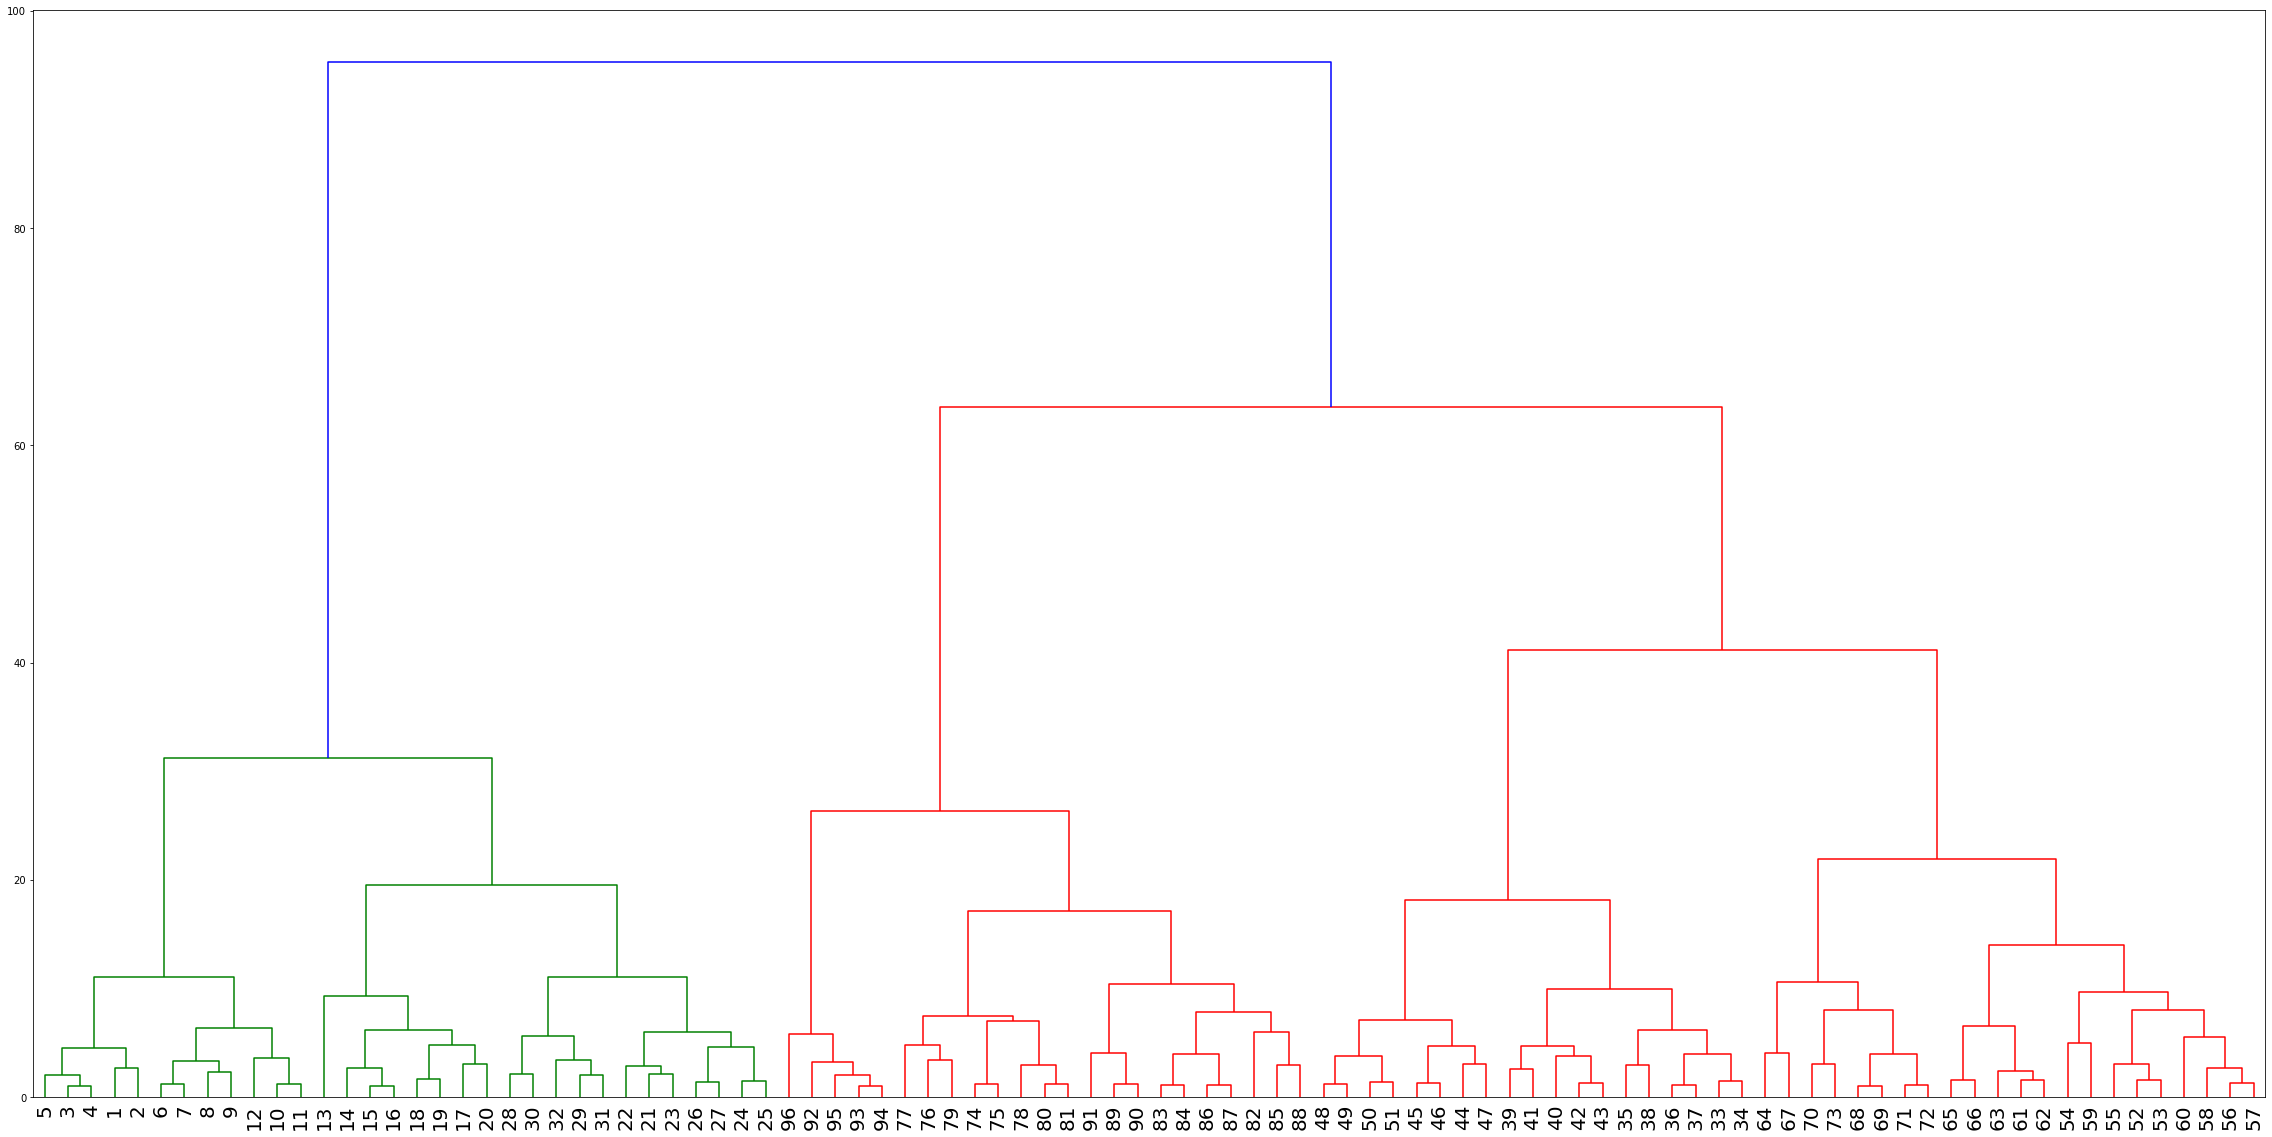

In [13]:
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = label['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=20,  
)
plt.show()

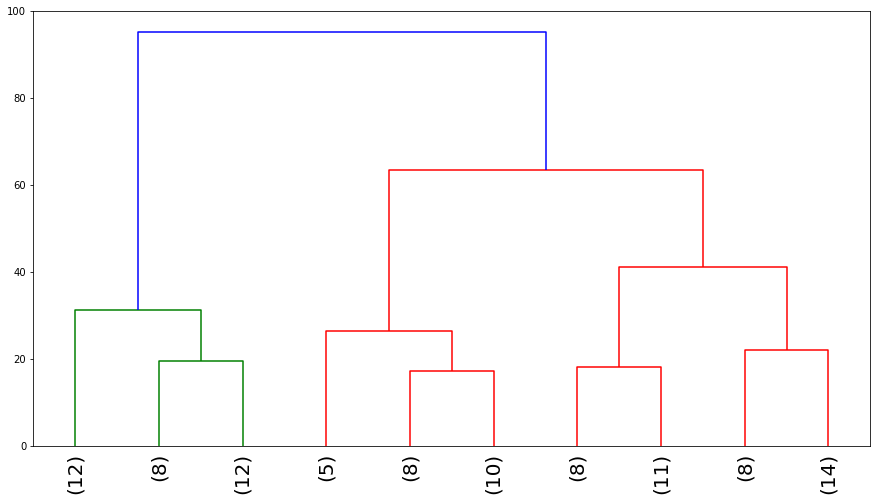

In [14]:
plt.figure(figsize=(15,8))
dendrogram(mergings,
           labels = label['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=20,  truncate_mode='lastp', p=10
)
plt.show()

In [15]:
cnt_i = 1
cnt = 250 * cnt_i

In [16]:
select_cell = 40

In [17]:
resist_test = resist.loc[select_cell:select_cell+20,:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
data_test

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,CellNo
40,0.488,0.484,0.484,0.485,0.484,0.484,0.488,0.489,0.486,0.488,...,0.619,0.619,0.619,0.619,0.619,0.619,0.619,0.619,0.619,41
41,0.484,0.483,0.485,0.485,0.485,0.488,0.487,0.488,0.486,0.487,...,0.573,0.573,0.573,0.573,0.573,0.573,0.573,0.573,0.573,42
42,0.474,0.472,0.473,0.474,0.473,0.474,0.472,0.474,0.473,0.474,...,0.556,0.556,0.556,0.556,0.556,0.556,0.556,0.556,0.556,43
43,0.489,0.492,0.492,0.494,0.495,0.493,0.486,0.490,0.491,0.492,...,0.652,0.652,0.652,0.652,0.652,0.652,0.652,0.652,0.652,44
44,0.470,0.476,0.476,0.475,0.475,0.476,0.474,0.475,0.476,0.478,...,0.554,0.554,0.554,0.554,0.554,0.554,0.554,0.554,0.554,45
45,0.481,0.478,0.476,0.478,0.478,0.480,0.469,0.485,0.493,0.502,...,0.541,0.541,0.541,0.541,0.541,0.541,0.541,0.541,0.541,46
46,0.458,0.461,0.460,0.462,0.462,0.463,0.461,0.463,0.463,0.467,...,0.644,0.644,0.644,0.644,0.644,0.644,0.644,0.644,0.644,47
47,0.475,0.473,0.472,0.473,0.474,0.473,0.469,0.472,0.476,0.479,...,0.573,0.573,0.573,0.573,0.573,0.573,0.573,0.573,0.573,48
48,0.492,0.494,0.494,0.492,0.492,0.492,0.493,0.491,0.491,0.495,...,0.539,0.539,0.539,0.539,0.539,0.539,0.539,0.539,0.539,49
49,0.476,0.475,0.477,0.478,0.479,0.480,0.480,0.486,0.490,0.494,...,0.642,0.642,0.642,0.642,0.642,0.642,0.642,0.642,0.642,50


In [18]:
rank = [[] for i in range(30)]

In [19]:
for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

1


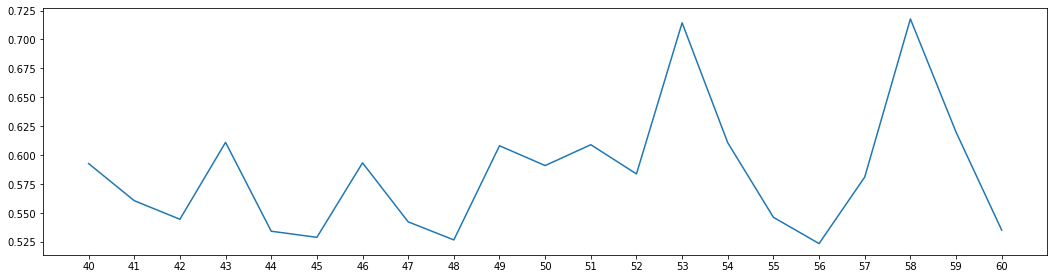

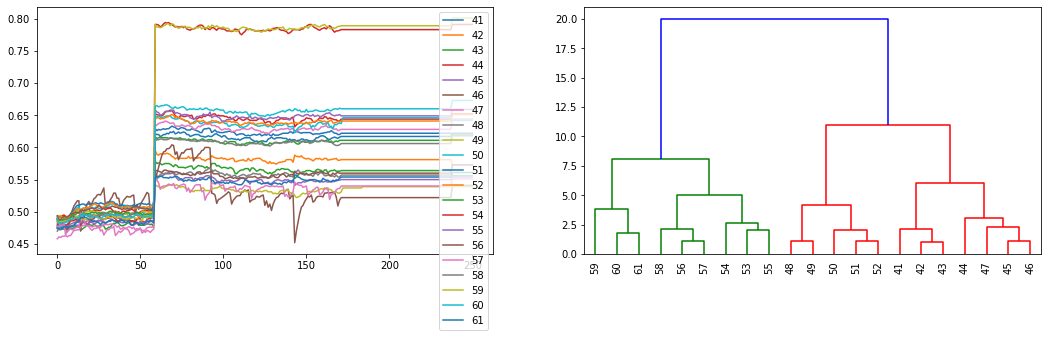

In [20]:
print(cnt_i)



#for i in range(70,91):
#    rank[cnt_i-1].append(np.mean(resist.loc[i,:cnt]))

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10
)
plt.show()
cnt_i += 1

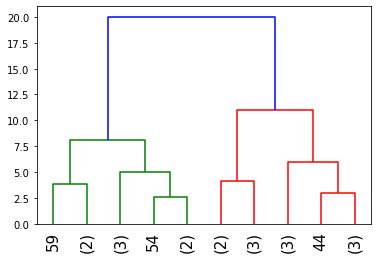

In [21]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [22]:
cnt_i

2

2


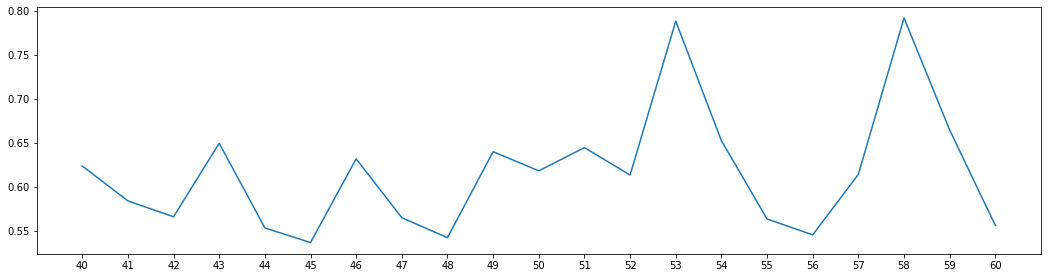

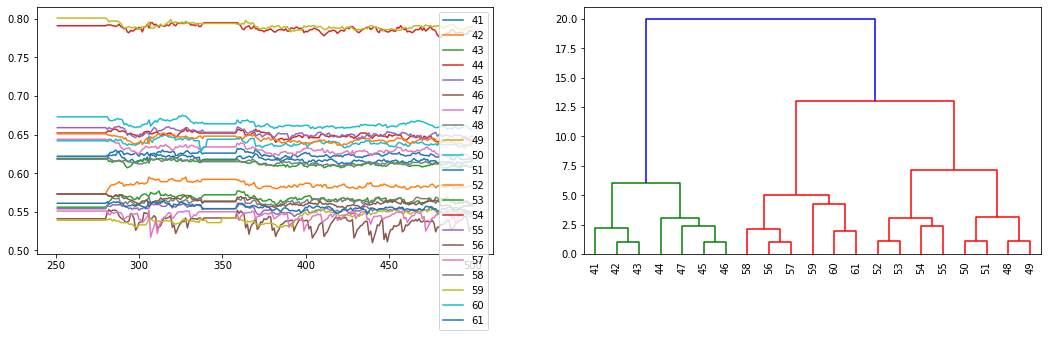

In [23]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

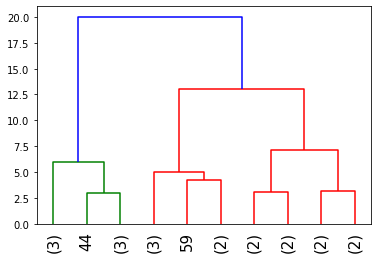

In [24]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

3


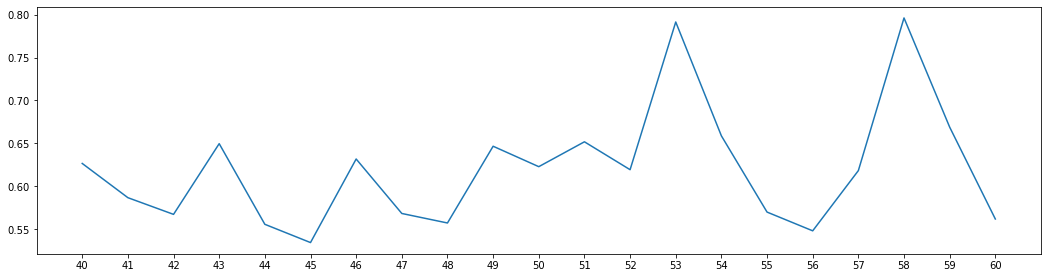

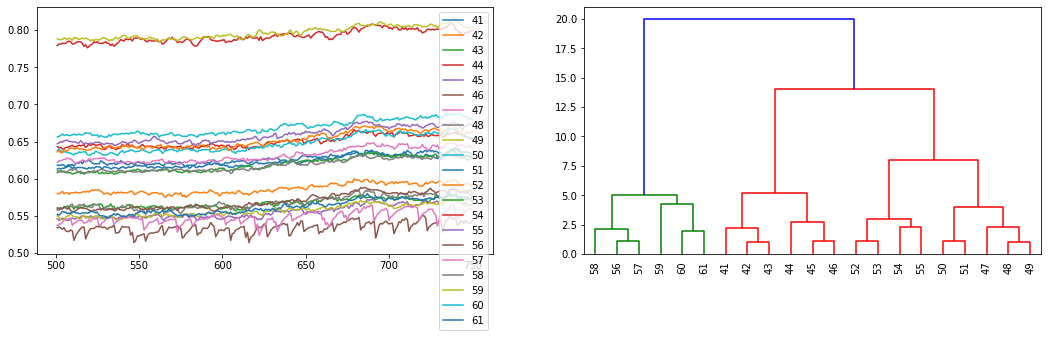

In [25]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

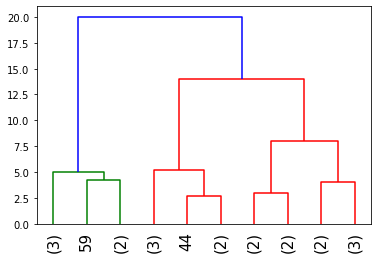

In [26]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

4


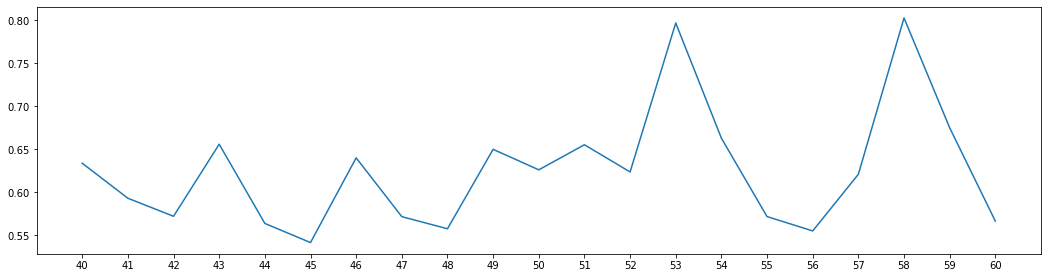

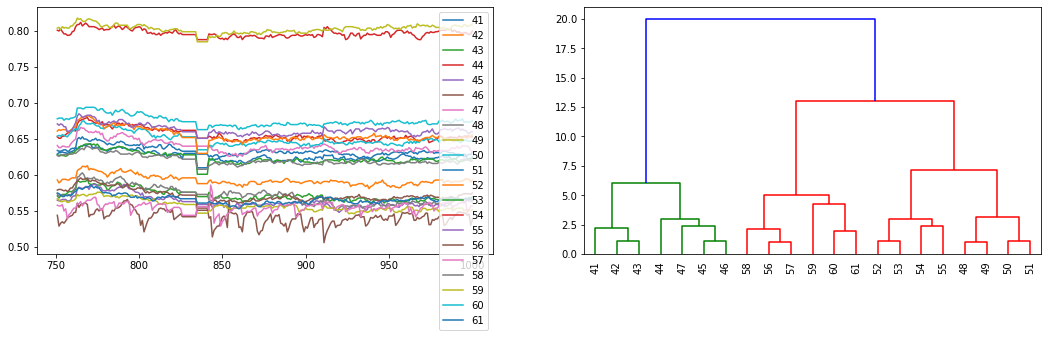

In [27]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

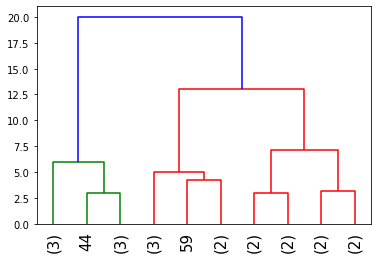

In [28]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

5


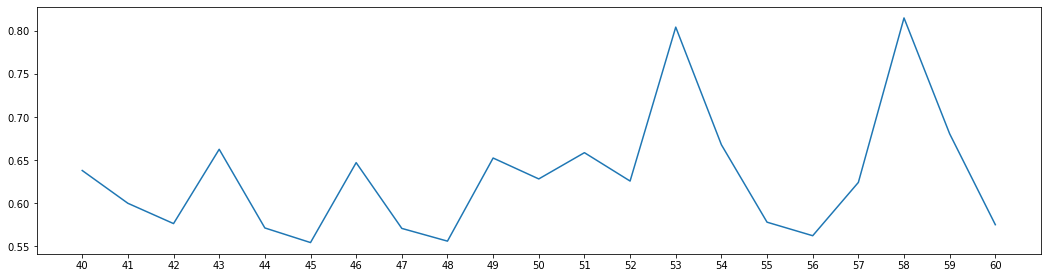

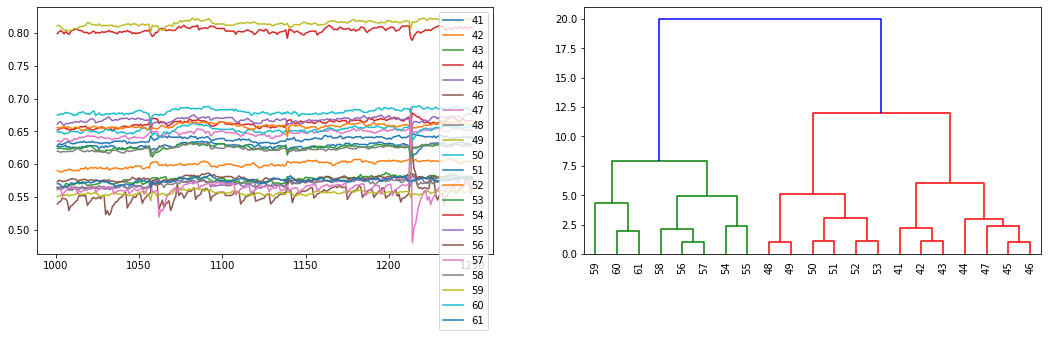

In [29]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

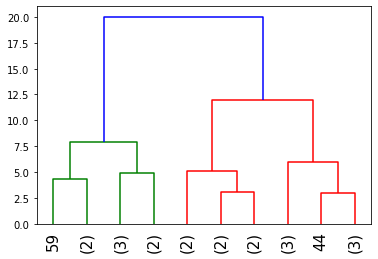

In [30]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

6


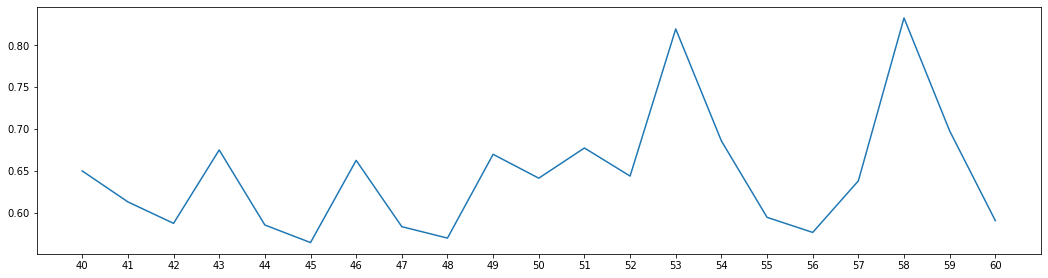

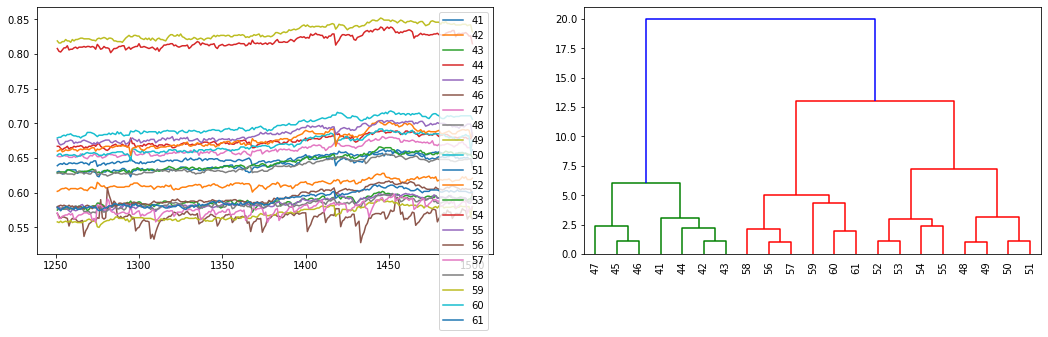

In [31]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

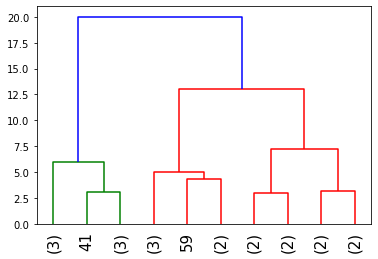

In [32]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

7


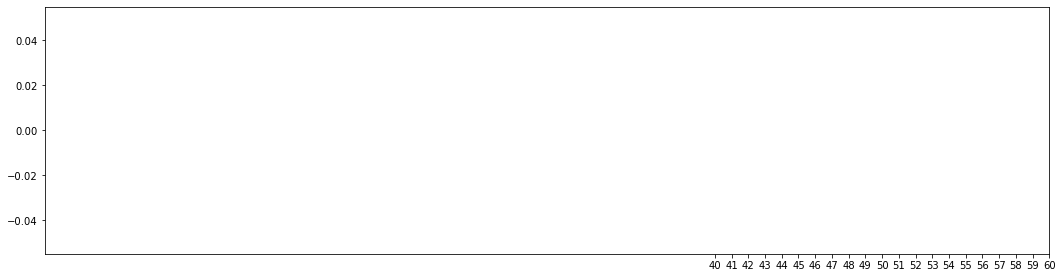

TypeError: cannot do slice indexing on Index with these indexers [1501] of type int

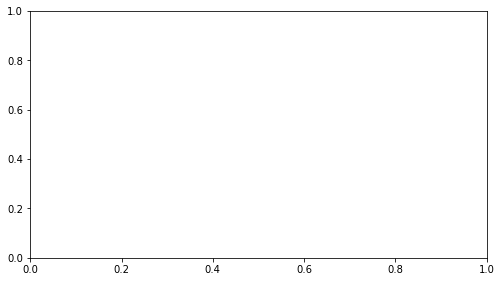

In [33]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+21,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

In [ ]:
cnt = 250 * cnt_i
print(cnt_i)


resist_test = resist.loc[select_cell:select_cell+20, cnt-249:cnt]
label_test = label[select_cell:select_cell+21]
data_test = pd.concat([resist_test, label_test], axis=1)
mergings_test = linkage(data_test, method='complete')

for i in range(select_cell,select_cell+21):
    rank[cnt_i-1].append(np.mean(resist.loc[i,cnt-249:cnt]))

ra = pd.DataFrame(rank[cnt_i-1])
ra_rows = np.arange(select_cell,select_cell+21,1)
ra.set_axis(ra_rows, axis='rows', inplace=True)

plt.figure(figsize=(18,10))

plt.subplot(2,2, (1,2))
plt.plot(ra)
plt.xticks(np.arange(select_cell,select_cell+31,1))
plt.show()
#print(pd.DataFrame(rank[cnt_i-1]))

plt.figure(figsize=(18,10))
plt.subplot(2, 2, 3)
for i in range(select_cell,select_cell+21):
    plt.plot(data_test.loc[i,cnt-249:cnt], label=i+1)
plt.legend()
    
mergings_test = linkage(data_test, method='complete')
plt.subplot(2, 2, 4)
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

cnt_i += 1

In [ ]:
dendrogram(mergings_test,
           labels = label_test['CellNo'].values,
           leaf_rotation=90,
           leaf_font_size=15, truncate_mode='lastp', p=10
)
plt.show()

## Kshape 사용

In [ ]:
from kshape.core import kshape, zscore

In [ ]:
resist_test = resist.loc[70:91,700:1400]
label_test = label[70:91]
resist_test_list = (np.array(resist_test)).tolist()

In [ ]:
for i in range(70,91):
    plt.plot(resist_test.loc[i,:], label=i+1)
plt.legend()
plt.show()

In [ ]:
cluster_num = 2
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1

In [ ]:
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1

In [ ]:
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1

In [ ]:
clusters = kshape(zscore(resist_test_list, axis=1), cluster_num)
print(clusters)
cluster_num += 1